# Daegu Apartments

### **Contents**

1. Business Problem
2. EDA
3. Data Prep
4. Modeling
5. Conclusion & Recommendation

****

### **1. Business Problem**

#### Background
****
Daegu is the third largest urban area in South Korea after Seoul and Busan, it is the third largest official metropolitan area in South Korea with 2.5 million residents. 
Daegu is a manufacturing industry city that is known for its textile industry, cultural heritage sites, and is home to various companies such as Daegu Bank and is also the city where Samsung was founded.

The population of Daegu is mostly Korean with a small number of foreign residents and has a median age of 43.3 years.

Daegu is also known for its education system, it hosts several universities in Korea including some of Korea's most prestigious medical institutions outisde of Seoul. 


#### Problem Statement
****
Being able to have a good grasp of apartment prices in Daegu is important becuase according to https://www.statista.com/statistics/1185119/south-korea-housing-types-daegu/, as of 2022  56.8% of households in Daegu were situated in apartments. In other words, more than half of the residents in Daegu lives in apartments. Being able to estimate apartment prices in an area will provide benefit to all parties including apartment owners, apartment seekers, developers, as well as the local government for the following reasons:

1. Preventing underpricing and overpricing:

    Considering apartment housing is the most popular method of housing in Daegu, it is safe to assume that it is always in high demand. It is better for both apartment sekeers and apartment sellers if the average price for a certain aparment with certain specifications could be identified. If a price rate could be identified it could be used for benchmarking, market analysis, as well as increasing transparency in the real estate market. 


2. Insight for investments:

    If an average property price could be found and if the variables that determines those prices could be recognized then it could be used to analyze the overall state of a real estate market in the area. Real estate developers could use this information to determine if the apartment market in Daegu is a buyer's market or a seller's market.

3. Comparing areas:

    Knowing the prices of apartments of different areas can help compare the living cost of those areas and could help potential apartment seekers make decision on where to live and help apartment sellers determine the price of said apartment.

With time, population count everywhere tends to increase, including in Daegu, Korea, and with the increase of population count there is surely an increase in housing accomodation demand and supply.

**Being able to determine the right and reasonable apartment price does not only benefit the sellers and buyers in the apartment market but also affects the economy of the city as a whole, especially considering Daegu is not only an urban city but also an industrial and educational city.**




### Objective

As mentioned before, a tool that is able to predict or estimate the value of an apartment unit help various parties involved tremendously to be able to give the right price, or at least the right price within a reasonable price range, for apartment units listed. 

This tool could be used by various parties for various business purposes to have an insight on the price of an apartment unit with certain specifications and provide both efficiency and convenience.

### Initial Analysis

First an analysis will be conducted to understand the natures of the data, the variables, as well as the condition of the apartment market in Daegu. Considering this analyst has never been or even heard of Daegu prior to this project, this part is very important to establish a foundation for the entire project.

Identifying features listed and weighing the importance of the features are also important in this phase as it will affect the performance of the tool.

### Modeling

Considering the nature of the data, machine learning regression is the most appropriate technique to investigate the relationship between the independent variables and the dependent variables. 

This analyst will put into practice all of the available regression algorithms which includes:
* Linear Regression 
* KNN Regressor
* Decision Tree Regressor
* Random Forest Regressor
* XGBoost Regressor

### Evaluation Metrics Used

The regular evaluation metrics will be used:
* Root Mean Squared Error - The results of MSE rooted, returning the unit value to its original target. 
* Mean Absolute Error - The result of calculating the average of errors made absolute. 
* Mean Absolute Percentage Error - Percentage of accuracy of the forecast system, perhaps the most intuitive metric used.

### Modules Used

In [65]:
#Basic
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest
import warnings

#Prep
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
import category_encoders as ce

#Scoring
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


warnings.filterwarnings('ignore')

### The Dataframe

In [66]:
df = pd.read_csv('data_daegu_apartment.csv')

In [67]:
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
N_FacilitiesNearBy(ETC),4123.0,1.930876,2.198832,0.0,0.0,1.0,5.0,5.0
N_FacilitiesNearBy(PublicOffice),4123.0,4.135338,1.802640,0.0,3.0,5.0,5.0,7.0
N_SchoolNearBy(University),4123.0,2.746301,1.496610,0.0,2.0,2.0,4.0,5.0
N_Parkinglot(Basement),4123.0,568.979141,410.372742,0.0,184.0,536.0,798.0,1321.0
YearBuilt,4123.0,2002.999757,8.905768,1978.0,1993.0,2006.0,2008.0,2015.0
N_FacilitiesInApt,4123.0,5.817851,2.340507,1.0,4.0,5.0,7.0,10.0
Size(sqf),4123.0,954.630851,383.805648,135.0,644.0,910.0,1149.0,2337.0
SalePrice,4123.0,221767.926995,106739.839945,32743.0,144752.0,209734.0,291150.0,585840.0


### Understanding the Data

Information is based on word document that came along with the dataframe:

* Hallway Type: Apartment Type

* TimeToSubway: Time needed to nearest subway station

* SubwayStation: The name of the nearest subway station

* N_FacilitiesNearBy(ETC): The number of facilities nearby

* N_FacilitiesNearBy(PublicOffice): The number of public office facilities nearby

* N_SchoolNearBy(University): The number of universities nearby

* N_Parkinglot(Basement): The number of the parking lot

* YearBuilt: The year the apartment was built

* N_FacilitiesInApt: Number of facilities in the apartment

* Size(sqft): The apartment size (in square feet)

* SalePrice: The apartment price (Won)

Generally, in property prices the location of the property has a large role in the price. The challenge in analyzing this dataframe is there is no information of latitude and longitude, making it hard to visualize where the apartments are geographically located. The next best thing that could be relied on to have an idea of the price per location is the "SubwayStation" feature.


### Data Cleaning

In [70]:
df.duplicated(keep='first')
df

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4121,corridor,5min~10min,Daegu,2.0,5.0,0.0,76.0,1985,3,676,73451


Checking for duplicate data from this dataframe is tricky because there are no primary keys that distinguishes one entry to another.

Considering it is highly possible and reasonable for most columns to be duplicates, because apartment units listed could be in the same building, not all columns could be checked for duplicates. 

One column that might be subject to checking however, is price.

In [71]:
df.pivot_table(columns=['SalePrice'], aggfunc='size').sort_values(ascending=False)

SalePrice
149274    46
168141    45
75920     41
265486    40
194690    36
          ..
211150    1 
34070     1 
209911    1 
209442    1 
585840    1 
Length: 838, dtype: int64

In [72]:
len(df["SalePrice"]) - len(df["SalePrice"].drop_duplicates())

3285

There are duplicate prices and there are a total of 3285 apartments listed with prices that are the same as at least one other apartment.

In [73]:
df.isnull().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

Although there are many duplicate price data, there's no way of knowing for sure without a primary key if it's an entry error or if it's a pricing strategy.

With that consideration and also because of the large amount of prices that are duplicates, this analyst will keep the prices in its entirety.

In [74]:
# Checking each column
col_list = df.columns.tolist()
col_list

def breaker(x):
    print (x * 100)
def val_count (col_list):
    for i in col_list:
        print (i)
        print (df[i].value_counts())
        print (f"max = {df[i].max()}")
        print (f"min = {df[i].min()}")
        
        breaker ("x")
        
    
val_count(col_list)

HallwayType
terraced    2528
mixed       1131
corridor    464 
Name: HallwayType, dtype: int64
max = terraced
min = corridor
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
TimeToSubway
0-5min                1953
5min~10min            787 
15min~20min           629 
10min~15min           583 
no_bus_stop_nearby    171 
Name: TimeToSubway, dtype: int64
max = no_bus_stop_nearby
min = 0-5min
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
SubwayStation
Kyungbuk_uni_hospital    1152
Myung-duk                1044
Banwoldang               529 
Bangoge                  502 
Sin-nam                  467 
no_subway_nearby         290 
Chil-sung-market         74  
Daegu                    65  
Name: SubwayStation, dtype: int64
max = no_subway_nearby
min = Bangoge
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
N_FacilitiesNearBy(ETC)
0.0 

As can be seen here, the apartment size is in square feet which is an imperial unit used only in certain parts of the world. 

For a better idea of the apartment sizes this analyst will convert the original unit into metric, a measurement unit we're more familiar with.

1 square foot = 0.092903 square meters

In [75]:
#Changing to measuring unit to metric, the one that the rest of the world uses.

def imperial_to_metric (x):
    metric = x * 0.092903
    return round(metric)

imperial_to_metric(6)

df["Size(sqf)"] = df["Size(sqf)"].apply(imperial_to_metric)
df

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,129,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,85,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,52,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,85,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,162,311504
...,...,...,...,...,...,...,...,...,...,...,...
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,85,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,135,242477
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,164,168141
4121,corridor,5min~10min,Daegu,2.0,5.0,0.0,76.0,1985,3,63,73451


Now the units have been converted to metrics, the columns will be adjusted accordingly.

Other columns will also be renamed for conciseness.

In [76]:
df.columns.tolist()

['HallwayType',
 'TimeToSubway',
 'SubwayStation',
 'N_FacilitiesNearBy(ETC)',
 'N_FacilitiesNearBy(PublicOffice)',
 'N_SchoolNearBy(University)',
 'N_Parkinglot(Basement)',
 'YearBuilt',
 'N_FacilitiesInApt',
 'Size(sqf)',
 'SalePrice']

In [77]:
mylabels = {'HallwayType' : "Hallway",
            'TimeToSubway' : 'Time_To_Subway',
            'SubwayStation' : 'Subway_Station',
            'N_FacilitiesNearBy(ETC)':'ETC_Facilities_Nearby',
            'N_FacilitiesNearBy(PublicOffice)' : 'Public_Office_Nearby',
            "N_SchoolNearBy(University)":"University_Nearby",
            "N_Parkinglot(Basement)": "Basement_Parking",
            "YearBuilt" : "Year",
            "N_FacilitiesInApt" : "Apt_Facilities",
            "Size(sqf)" : "M2",
            "SalePrice" : "Price",
            }
df.rename(index = str, columns = mylabels, inplace = True)
df

,Hallway,Time_To_Subway,Subway_Station,ETC_Facilities_Nearby,Public_Office_Nearby,University_Nearby,Basement_Parking,Year,Apt_Facilities,M2,Price
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,129,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,85,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,52,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,85,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,162,311504
...,...,...,...,...,...,...,...,...,...,...,...
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,85,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,135,242477
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,164,168141
4121,corridor,5min~10min,Daegu,2.0,5.0,0.0,76.0,1985,3,63,73451


This analyst assumes the price is per thousand Wons because otherwise the price does not make sense. 

See reasoning below for clarification.

In [78]:
#Showing lowest apartment price in USD
def won_usd (usd):
    return usd / 1260 

lowest_price = df["Price"].sort_values(ascending=False).tail(1).reset_index().iloc[0]["Price"]
price_per_thousands = won_usd(lowest_price)*1000

print (f"\nLowest apartment price in the dataframe is {lowest_price:,} WON,\nThe price is equivalent to {won_usd(lowest_price).round(3):,} USD",
       "\n\nConsidering this number is far from being likely for an apartment price this analyst assumes the price is per thousands of WON.",
       f"\n\nPrice if original price assumed to be per thousands: {price_per_thousands.round(2):,} USD \nThis price seems more realistic for apartment property price.")


Lowest apartment price in the dataframe is 32,743 WON,
The price is equivalent to 25.987 USD 

Considering this number is far from being likely for an apartment price this analyst assumes the price is per thousands of WON. 

Price if original price assumed to be per thousands: 25,986.51 USD 
This price seems more realistic for apartment property price.


# 2.EDA

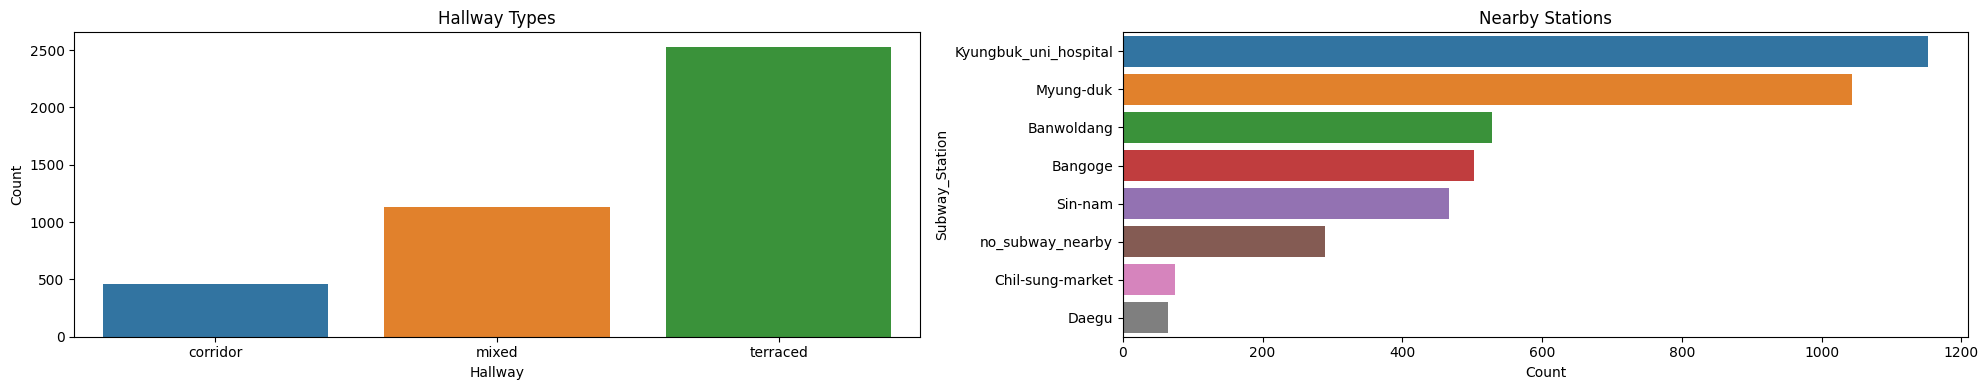

In [79]:
fig, (box1, box2) = plt.subplots(1, 2, figsize=(20, 4))

hallway_type = df.groupby("Hallway").size().reset_index().rename(columns = {0:"Count"})
subway_station_count = df.groupby("Subway_Station").size().reset_index().rename(columns = {0:"Count"}).sort_values("Count",ascending=False)
box1 = sns.barplot(ax=box1,data=hallway_type,x="Hallway", y="Count").set_title("Hallway Types")
box2 = sns.barplot(data=subway_station_count,x="Count", y="Subway_Station").set_title("Nearby Stations")
fig.tight_layout()

Most apartments in Daegu has terraced hallways and Kyungbuk University Hospital and Myung-duk are the stations with most apartments nearby.

More importantly this tells us there are no typos or errors in the data of these columns.

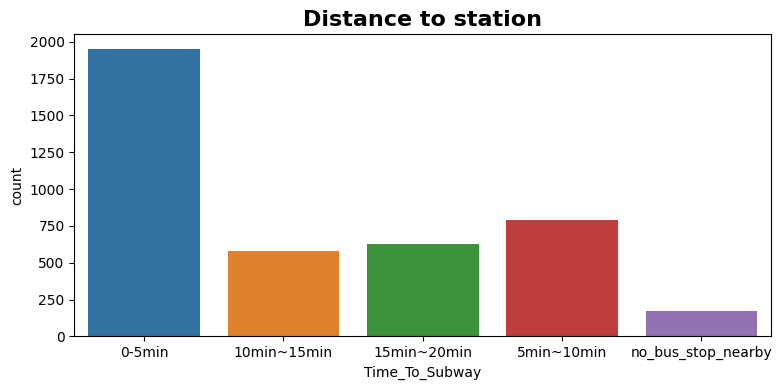

In [80]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(data=df, x="Time_To_Subway")
plt.title("Distance to station",fontsize=16,fontweight="bold")
fig.tight_layout()

Most apartments are within 5 minutes away from subway stations.

Some distance formatting are inconsistent but there are no typos / data outside the existing categories.

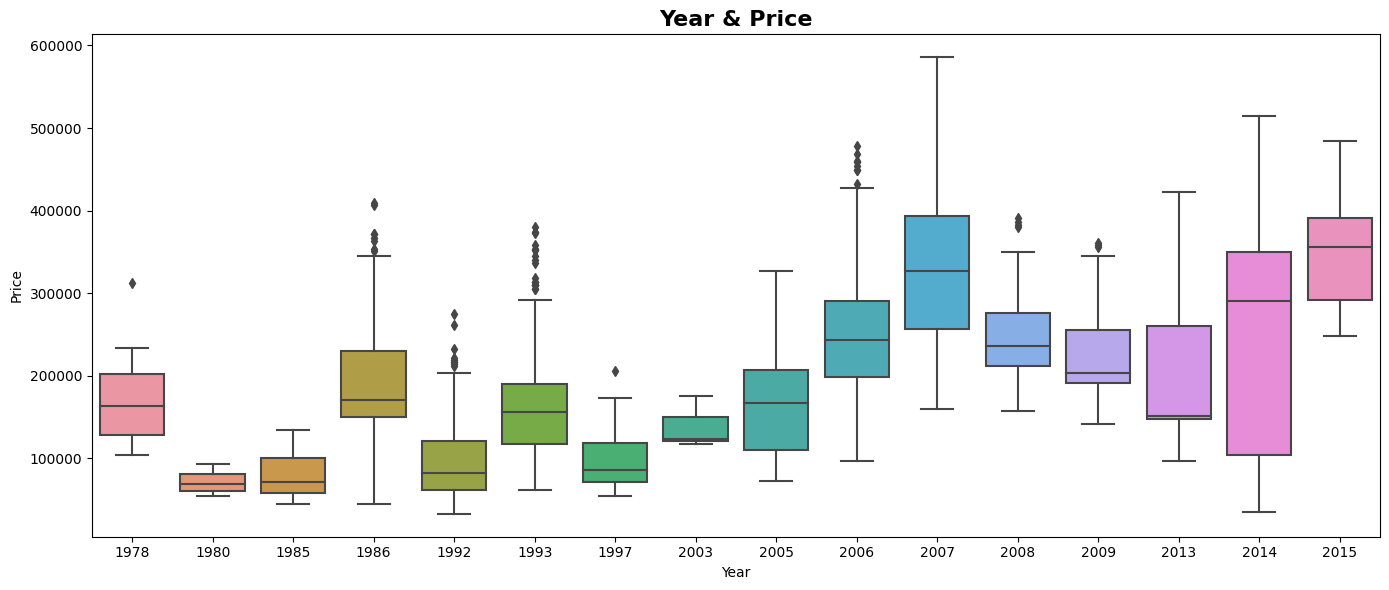

In [81]:
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=df["Year"], y="Price", data=df)
plt.title("Year & Price",fontsize=16,fontweight="bold")
f.tight_layout()

At a glance there doesn't seem to be any clear pattern between year of apartment and price.

I assumed the newer the apartment the higher the price, it appears my assumption is wrong, the relationship is not linear.

Some older apartments such as the one from 2007 interestingly have higher prices if compared to the new ones such as those in 2008 - 2015. This analyst suspects this feature may have a high impact on the machine learning accuracy. 

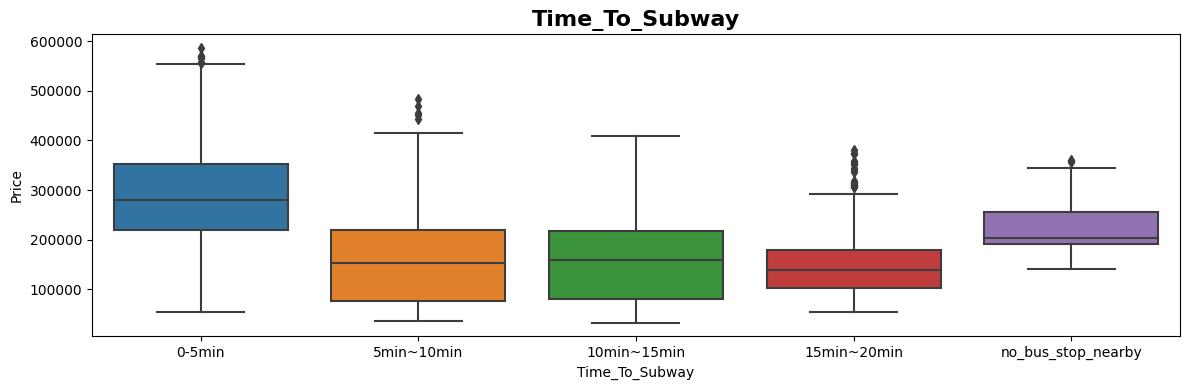

In [82]:
f, ax = plt.subplots(figsize=(12, 4))
fig = sns.boxplot(x="Time_To_Subway", y="Price", data=df, order=["0-5min","5min~10min",
                                                                 "10min~15min","15min~20min",
                                                                 "no_bus_stop_nearby"])
plt.title("Time_To_Subway",fontsize=16,fontweight="bold")
f.tight_layout()

This visualization shows there's a more linear relationship between time to subway and price compared to year & price. It seems the longer away the distance between the unit to the station, the lower the price. 

Up to 10-15 minutes away, the closer the apartment unit to the station the more expensive it is. This is inline with common knowledge of property price, the better access of transportation the more it's worth.

Starting from "15-20 min" away to "no_bus_stop_nearby", there appears to be some anomaly. The price minimum of the units with no station nearby are higher than all others and have a smaller price range if compared with the rest. This might be because the units are located in higher-end areas where people usually commute using their personal vehicles instead of needing public transport. 

This assumption is also backed the high amount of outliers in the listed apartments that are 15-20 minutes away from the station. Perhaps this category is a mix between apartments for people that rely on public transportation and for people that commutes using their personal vehicles.

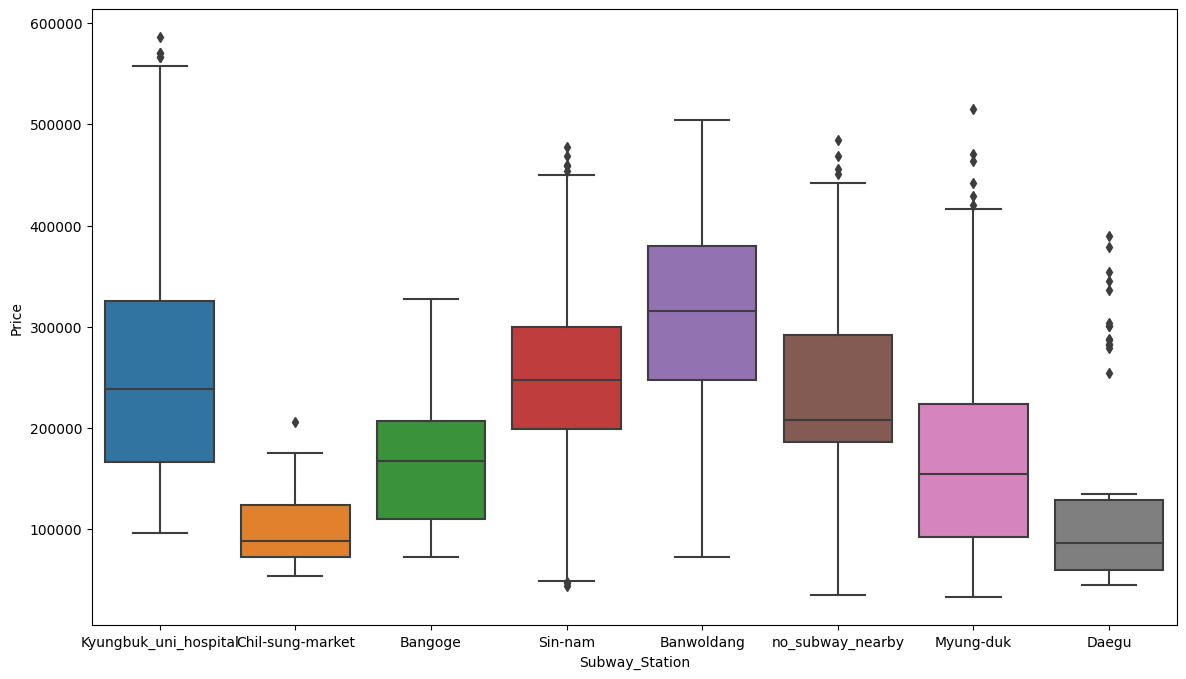

In [83]:
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=df["Subway_Station"], y="Price", data=df)

Daegu station has an alarming amount of outliers that are far from the median price of apartments in the surrounding area of the station.

However, this analyst has tried removing the outliers with hopes that it will result in a lower MAPE and that was not the case, removing the outliers in Daegu area increases the MAPE rate, resulting in a worse output. Because of that, this analyst will leave the outliers per station as it is.

<AxesSubplot: title={'center': 'Price, size, and nearby station'}, xlabel='M2', ylabel='Price'>

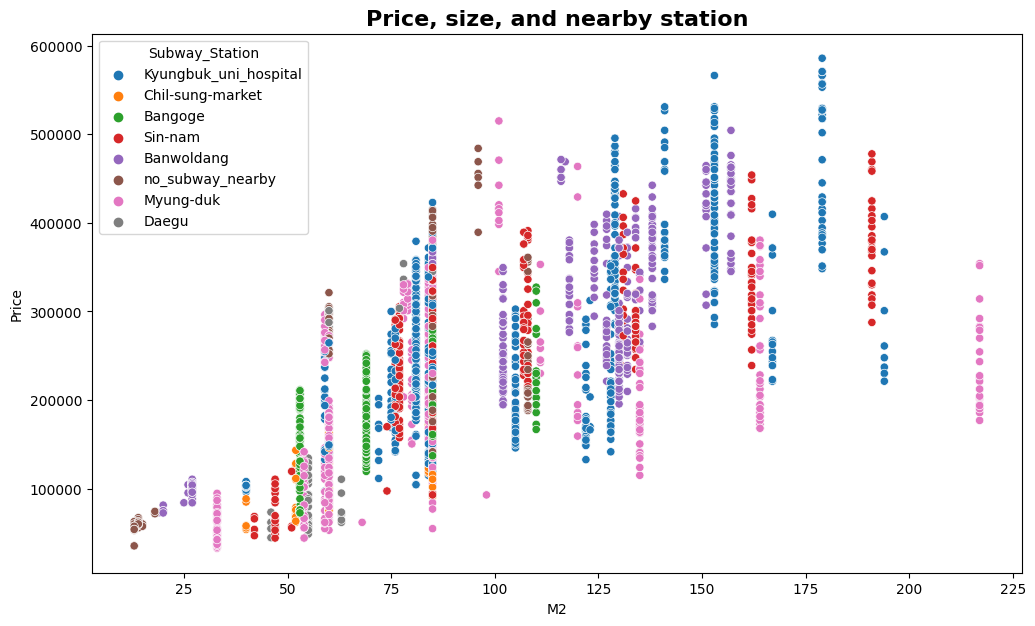

In [84]:

plt.figure(figsize=(12, 7))
plt.title("Price, size, and nearby station",fontsize=16,fontweight="bold")
sns.scatterplot (data = df, x = "M2", y="Price", hue = "Subway_Station")

At a glance we can see there is a pattern of linearity, the bigger the apartment unit size the higher the price but upon closer inspection we could see there are some apartment units that are more spacious but with lower price. From this, we conclude that size alone is not enough to determine the prices of apartments in Daegu.

From the information & visualization above we also learn there are very many different apartment sizes in Daegu with 85 sqm as the size of most apartments.

The largest apartment size is not the most expensive and it is all in the area nearby Myung-duk station.

Interestingly there are some single dots on the chart. Bear in mind this analyst has very limited domain knowledge on apartment prices and types in Daegu, Korea and there is minimum information on the dataset as well so this assumption is highly speculative, however these points could be put into consideration:
- Apartment buildings usually host more than 1 apartment units.
- Apartment buildings usually have template apartment sizes.
- If one template size is listed in the market, one can assume at least another unit of exact size / specs in the same area is also listed in the market.
- Even if it turns out there are units with unique apartment unit sizes, the data does not represent the price in the market well as it is the only one of its kind.
- Error in data entry could highly affect the performance of analysis and the model. 

With the rationalization above this analyst will remove the lone entries.

In [85]:
#Before
loners = df["M2"].value_counts().tail(10)
loners

51     3
26     2
15     2
18     2
74     2
117    1
19     1
25     1
68     1
98     1
Name: M2, dtype: int64

In [86]:
#After
df = df[df["M2"] != 117]
df = df[df["M2"] != 19]
df = df[df["M2"] != 25]
df = df[df["M2"] != 68]
df = df[df["M2"] != 98]
loners2 = df["M2"].value_counts().tail(10)
loners2

96     6
20     5
42     5
123    4
46     4
51     3
26     2
15     2
18     2
74     2
Name: M2, dtype: int64

## 3.Data Peparation

### Creating a copy to avoid error or modification to original dataframe.

In [87]:
df_2 = df.copy()

#### Unique Value Checking

In [88]:
pd.set_option('display.max_colwidth', 1)

item_list = []
for col in df_2.columns :
    item_list.append( [col, df_2[col].nunique(), df_2[col].unique()])

desc_tab = pd.DataFrame(columns=['Name', 'Unique Amount', 'Unique Values'],
                     data=item_list)
desc_tab

,Name,Unique Amount,Unique Values
0,Hallway,3,"[terraced, mixed, corridor]"
1,Time_To_Subway,5,"[0-5min, 10min~15min, 15min~20min, 5min~10min, no_bus_stop_nearby]"
2,Subway_Station,8,"[Kyungbuk_uni_hospital, Chil-sung-market, Bangoge, Sin-nam, Banwoldang, no_subway_nearby, Myung-duk, Daegu]"
3,ETC_Facilities_Nearby,4,"[0.0, 1.0, 5.0, 2.0]"
4,Public_Office_Nearby,8,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
5,University_Nearby,6,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
6,Basement_Parking,20,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0, 108.0, 1174.0, 930.0, 475.0, 184.0, 400.0, 218.0, 1321.0, 524.0, 76.0, 79.0, 181.0, 18.0]"
7,Year,16,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 1993, 2013, 2008, 2015, 1978, 1985, 1992, 2003, 1980]"
8,Apt_Facilities,9,"[10, 4, 5, 7, 2, 9, 8, 1, 3]"
9,M2,66,"[129, 85, 52, 162, 124, 53, 27, 105, 78, 108, 60, 77, 69, 81, 151, 157, 118, 138, 14, 131, 130, 84, 63, 33, 132, 59, 110, 13, 76, 153, 128, 217, 116, 42, 55, 75, 191, 47, 54, 127, 102, 40, 26, 123, 101, 80, 179, 107, 120, 164, 134, 194, 141, 135, 122, 167, 111, 96, 79, 72, 46, 20, 15, 18, 51, 74]"


<AxesSubplot: >

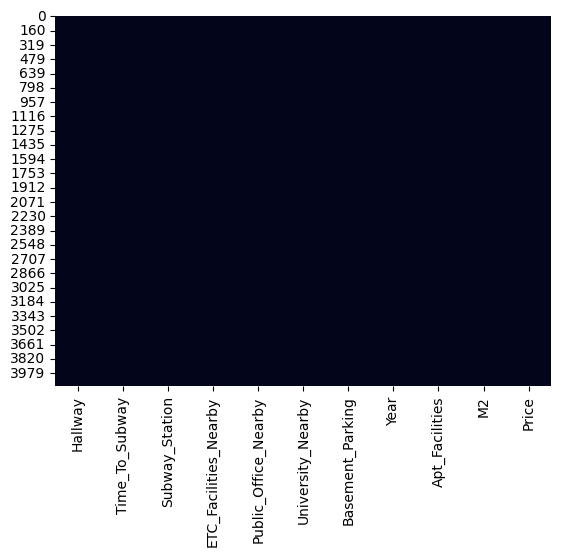

In [89]:
# Checking again for good measure.
sns.heatmap(df_2.isnull(), cbar=False)

Even though we've established there are no missing data during data cleaning, there's no harm in making sure because sometimes recieving data that is as clean is too good to be true.

The heatmat shows there are no missing data in any columns.

This analyst believes all columns are relevant to the model and no further cleaning is needed.

#### Checking for Linearity

Although there has been some insights from the EDA and visualization before that tells us if a data is linear or not, we're going to go through it once more for good measures.

The easiest way to detect linearity is through visualization and below is a visualization matrix between the features.

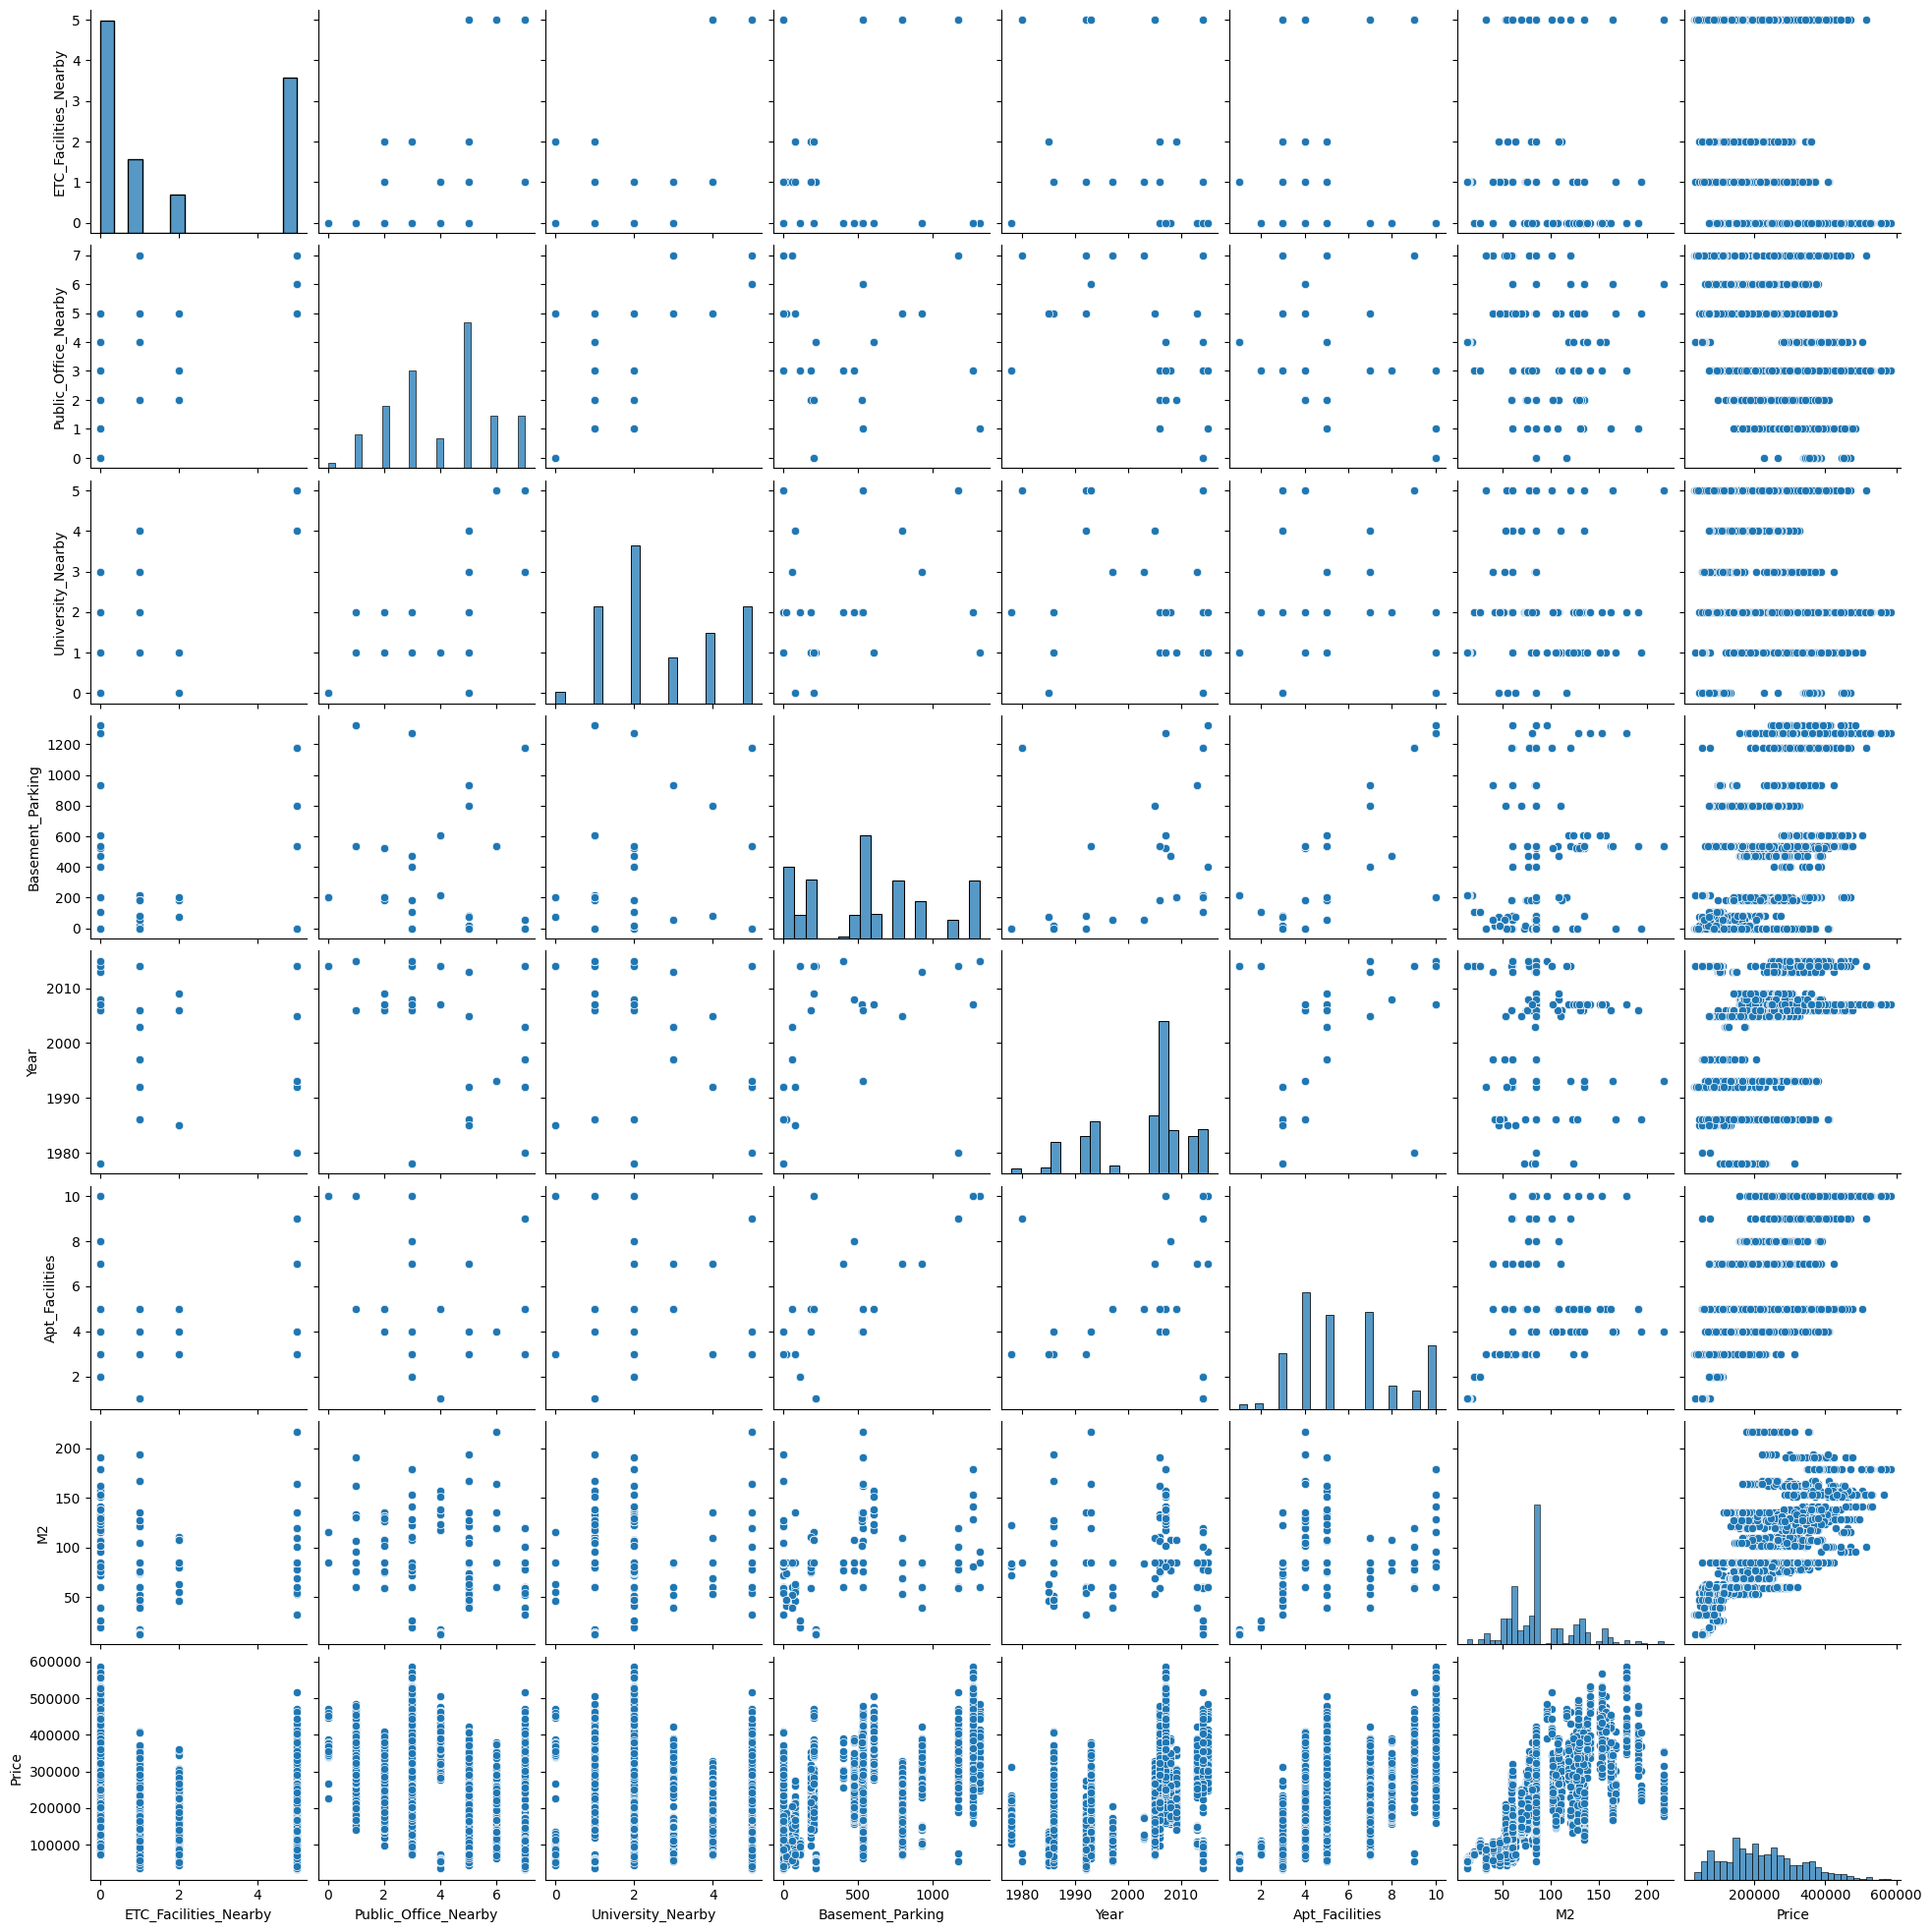

In [90]:
sns.pairplot(df)

As can be seen on the matrix visualization above, there is one somewhat linear pattern between target and feature, the size and price.

The rest however do not show linearity.

#### Correlations

We will take a look at the numerical data and see the correlation between the independent variables and the dependent variable. 

Text(0.5, 1.0, 'Correlation Matrix')

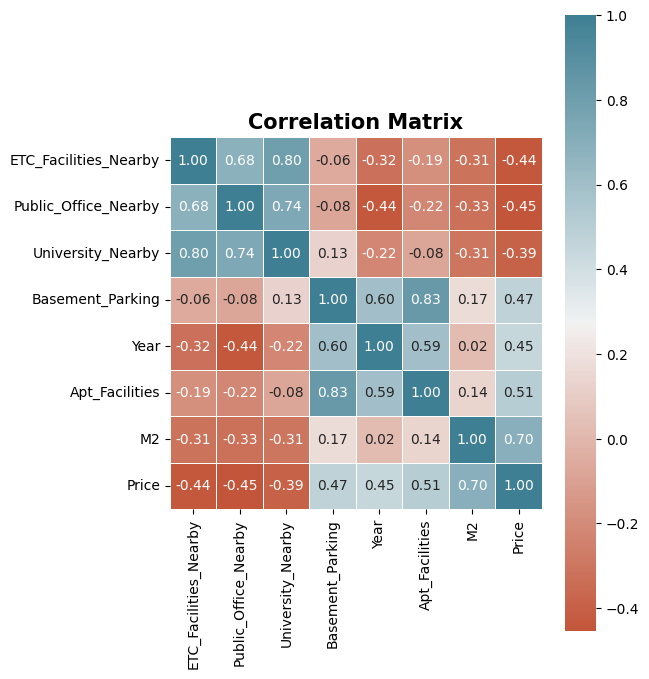

In [91]:
# Correlation matrix
plt.figure(figsize=(6, 8))
palette=sns.diverging_palette(20, 220, n=256)
corr = df_2.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold')

Judging by the correlation matrix above we can see:
- Size (M2) is the feature with higehst correlation to the dependent variable.
- Apt_Facilities is another feature that has moderate correlation with the dependent variable.
- Year and Basement parking have little correlation to the dependent variable.
- ETC_Facilities_Nearby, Public_Office_Nearby, University_Nearby have low, negative correlation to the target.

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

multicol_test0 = df_2.drop(['Subway_Station','Time_To_Subway','Hallway'],axis='columns')
multicol_test = multicol_test0.drop(['Price'], axis='columns')
multicol_test

vif_data = pd.DataFrame()
vif_data["feature"] = multicol_test.columns
vif_data

vif_data["VIF"] = [variance_inflation_factor(multicol_test.values, i)
                          for i in range(len(multicol_test.columns))]
  
vif_data

,feature,VIF
0,ETC_Facilities_Nearby,5.470745
1,Public_Office_Nearby,15.345157
2,University_Nearby,18.259569
3,Basement_Parking,12.294644
4,Year,34.535302
5,Apt_Facilities,27.971238
6,M2,8.615138


In [93]:
temp_df = df_2
temp_df = df_2.drop(columns=["Price",'Subway_Station','Time_To_Subway','Hallway'])

temp_df

vif_data2 = pd.DataFrame()
vif_data2["feature"] = temp_df.columns
vif_data2

vif_data2["VIF"] = [variance_inflation_factor(temp_df.values, i)
                          for i in range(len(temp_df.columns))]
  
vif_data2

,feature,VIF
0,ETC_Facilities_Nearby,5.470745
1,Public_Office_Nearby,15.345157
2,University_Nearby,18.259569
3,Basement_Parking,12.294644
4,Year,34.535302
5,Apt_Facilities,27.971238
6,M2,8.615138


As someone that is new to machine learning, this VIF chart is very worrying. Anything above VIF score 5 (or 10, depending on source) indicates there is strong multicollinearity.

Multicollinearity have been known to cause confusion to regression algorithms and may negatively impact the outcome. 

Comparing the VIF chart with the correlation matrix, there are some features that could left out due to the low correlation and high multicollinearity.

Those features are:
- Year - this feature has the highest VIF value and moderate - low correlation to the target.
- Basement Parking - has high VIF, high correlevancy with apartment facilities, and relatively low correlation score.

This note, however, is for future optimization of the model. For this iteration, this analyst will keep the features as it is.

### Outlier Handling

Before we proceed, we need to check the condition of the data distributions and if there are any outliers.

We will first do so by visualizing the distribution.

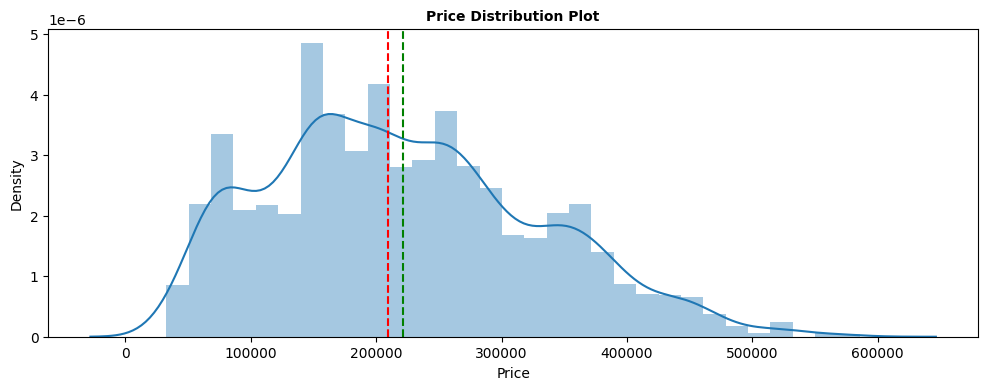

In [94]:
plt.figure(figsize=(12, 4))
sns.distplot(df_2['Price'])
plt.title('Price Distribution Plot', size=10, weight='bold')
plt.axvline(df_2.median()["Price"] #The median line
            , linestyle="--",
            color="red")
plt.axvline(df_2.mean()["Price"] #The mean line
            , linestyle="--",
            color="green")

It appears the data has a slight right skew, distribution is not normal.

The green line represents the mean line and the red line represents the median line.The mean and median lines are relatively close to each other meaning it's not skewed too severely.

Checking p-value to make sure.

In [95]:
stats, pval = normaltest(df_2["Price"])
if pval <= 0.05:
    print('not normal')
else:
    print('normal')
    
print (stats)
print (pval)

not normal
157.81434409645865
5.383324965280429e-35


Based on the test above it could be seen the data is not normal with the p-value far below the 0.05 threshold.

We then will visualize using a boxplot to see the severity of the outliers.

<AxesSubplot: title={'center': 'Outliers'}>

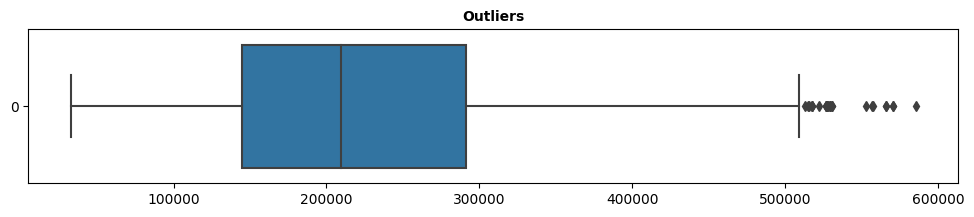

In [96]:
plt.figure(figsize=(12, 2))
plt.title('Outliers', size=10, weight='bold')
sns.boxplot(data=df_2['Price'], orient="h")

From the boxplot visualization above we learn there are some outliers, some very close to the upper limit.

Now we will identify the exact amount of outliers by filtering values that are over the upper limit.

In [97]:
#looking for precise amount of outliers by filtering out those not in the upper & lower limit.
def outlier_filter(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    lower_limit = q1 - limit
    upper_limit = q3 + limit
    outliers = data[data> upper_limit].count()
    outlier_percentage = outliers / len(data) * 100
    print(f'Lower Limit: {lower_limit}')
    print(f'Upper Limit: {upper_limit}')   
    print (f"Amount of outliers: {outliers}")
    print (f"Percentage of outliers: {outlier_percentage.round(2)}%")
    
outlier_filter (df_2["Price"])

IQR: 146303.0
Lower Limit: -74607.5
Upper Limit: 510604.5
Amount of outliers: 27
Percentage of outliers: 0.66%


Through the function we've learned that there are 27 outliers in the price distribution of the data which makes up 0.66% of the total amount of data. 

Outlier handling is very complicated and outliers are only to be deleted if backed by very good reasons as it could influence the outcome significantly. 

With this in mind, we will take a closer look at the outliers.

In [98]:
df_outlier = df_2[df_2['Price'] > 510747.0].sort_values(["Price"],ascending=False)
df_outlier

,Hallway,Time_To_Subway,Subway_Station,ETC_Facilities_Nearby,Public_Office_Nearby,University_Nearby,Basement_Parking,Year,Apt_Facilities,M2,Price
2128,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,179,585840
550,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,179,570796
2918,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,179,570796
204,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,153,566371
234,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,179,566371
3545,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,179,557522
3949,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,179,556637
549,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,179,553097
1180,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,153,530973
2100,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,141,530973


In [99]:
df_outlier.groupby("M2").count()["Price"]

M2
101    1 
141    2 
153    7 
179    17
Name: Price, dtype: int64

Judging by the characteristics of the outlier data:
- Most, except 1, are within 0-5 minutes distance to Kyungbuk Uni Hospital.
- Multiple similar apartment square meter size.
- Same amount of basement parking space.
- Same year.

This analyst believes the apartments being sold with outlier prices, except for the one near Myung-duk station, are all in the same apartment building. 

In [100]:
df_kyungbuk179 = df_2[(df_2['Year'] == 2007) & (df_2['Subway_Station'].str.contains('Kyungbuk_uni_hospital') & (df_2['M2'] == 179))]
df_kyungbuk179.sort_values("Price",ascending=False).reset_index()

,index,Hallway,Time_To_Subway,Subway_Station,ETC_Facilities_Nearby,Public_Office_Nearby,University_Nearby,Basement_Parking,Year,Apt_Facilities,M2,Price
0,2128,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,179,585840
1,2918,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,179,570796
2,550,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,179,570796
3,234,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,179,566371
4,3545,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,179,557522
5,3949,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,179,556637
6,549,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,179,553097
7,3868,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,179,529203
8,971,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,179,529203
9,3379,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,179,529203


In [101]:
df_kyungbuk_apartments = df_2[(df_2['Subway_Station'] == "Kyungbuk_uni_hospital")]
df_kyungbuk_apartments.groupby("Basement_Parking").count() 
#The reason why it's grouped by parking space is because this analyst believes there's a 
# low chance for different apartment buildings to have exactly the same amount of parking space


,Hallway,Time_To_Subway,Subway_Station,ETC_Facilities_Nearby,Public_Office_Nearby,University_Nearby,Year,Apt_Facilities,M2,Price
Basement_Parking,,,,,,,,,,
0.0,271,271,271,271,271,271,271,271,271,271
184.0,139,139,139,139,139,139,139,139,139,139
930.0,322,322,322,322,322,322,322,322,322,322
1270.0,420,420,420,420,420,420,420,420,420,420


From the table above we now know there are 4 apartment buildings that have apartment units for sale nearby Kyungbuk station based on the amount of parking space.

This analyst assumes there's a low chance of two different apartment buildings with the exact same amount of basement parking space.

In [102]:
#Percentage of outlier in the apartment unit with 1270 parking space.
kyungbuk_outlier_percentage = round((len(df_outlier)-1)/420*100,2) #Amount of units sold from apartment building with 1270 parking space.
kyungbuk_outlier_percentage

6.19

In [103]:
df_myungduk = df_2[(df_2['Year'] == 2014) & (df_2['Subway_Station'].str.contains('Myung-duk') & (df_2['M2'] == 101))]
df_myungduk.sort_values("Price",ascending=False)


,Hallway,Time_To_Subway,Subway_Station,ETC_Facilities_Nearby,Public_Office_Nearby,University_Nearby,Basement_Parking,Year,Apt_Facilities,M2,Price
3502,terraced,0-5min,Myung-duk,5.0,7.0,5.0,1174.0,2014,9,101,515044
211,terraced,0-5min,Myung-duk,5.0,7.0,5.0,1174.0,2014,9,101,470796
3724,terraced,0-5min,Myung-duk,5.0,7.0,5.0,1174.0,2014,9,101,442477
1609,terraced,0-5min,Myung-duk,5.0,7.0,5.0,1174.0,2014,9,101,420353
170,terraced,0-5min,Myung-duk,5.0,7.0,5.0,1174.0,2014,9,101,415929
691,terraced,0-5min,Myung-duk,5.0,7.0,5.0,1174.0,2014,9,101,415929
1729,terraced,0-5min,Myung-duk,5.0,7.0,5.0,1174.0,2014,9,101,415929
321,terraced,0-5min,Myung-duk,5.0,7.0,5.0,1174.0,2014,9,101,414159
3643,terraced,0-5min,Myung-duk,5.0,7.0,5.0,1174.0,2014,9,101,411504
3991,terraced,0-5min,Myung-duk,5.0,7.0,5.0,1174.0,2014,9,101,402654


It shows the outlier data from the apartment near Kyungbyuk station with 1270 parking space makes up 6.19% of the total data. 

Although 6.19% is also significant amount of data, there are plenty other data that are below the IQR upper limit that could represent the price variations well from apartment building 1270.

To add to that, the outlier data makes up only 0.65% of the total data.

The outlier data from the area nearby Myungduk station is only 1 / 10 of other apartments of the same size. 

After further exploration, this analyst believes removing the outlier is a small price to pay for optimal performance of the regression model.


Text(0.5, 1.0, 'After')

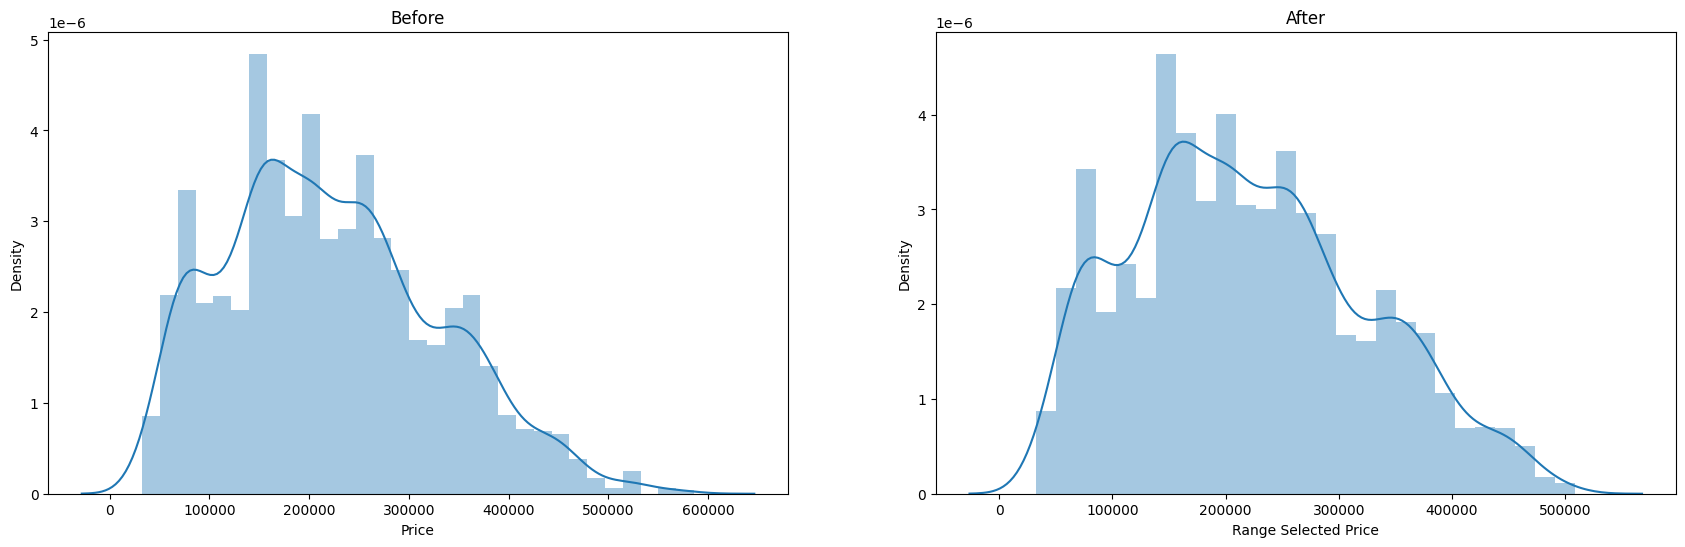

In [104]:
#Removing outliers
df_2 = df_2[(df_2['Price'] <= 510747.0)]
fig, axes = plt.subplots(1,2, figsize=(21, 6))

sns.distplot(df['Price'], ax=axes[0])
sns.distplot(df_2['Price'], ax=axes[1])
axes[0].set_xlabel('Price')
axes[1].set_xlabel('Range Selected Price')



axes[0].set_title("Before")
axes[1].set_title("After")

In [105]:
outlier_filter (df_2["Price"])


IQR: 142858.0
Lower Limit: -69535.0
Upper Limit: 501897.0
Amount of outliers: 3
Percentage of outliers: 0.07%


Price data is now far less skewed if compared to before and the percentage of outliers is now 0.07% from 0.65%, a drastic improvement without sacrificing too much information.

### Checking Apartment Sizes

IQR: 45.0
Lower Limit: -7.5
Upper Limit: 172.5
Amount of outliers: 81
Percentage of outliers: 1.98%


<AxesSubplot: title={'center': 'Apartment Size Outliers'}>

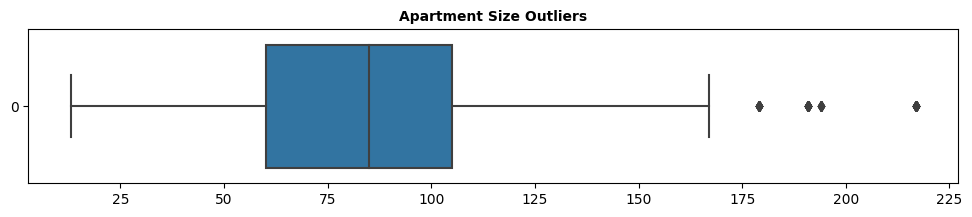

In [106]:
outlier_filter (df_2["M2"])
plt.figure(figsize=(12, 2))
plt.title('Apartment Size Outliers', size=10, weight='bold')
sns.boxplot(data=df_2['M2'], orient="h")

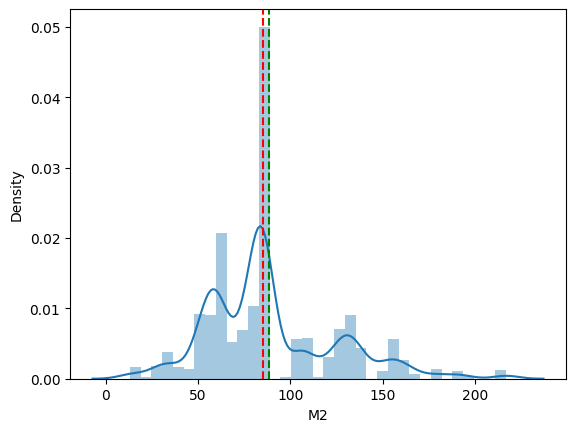

In [107]:
sns.distplot(df['M2'])
plt.axvline(df_2.median()["M2"] #The median line
            , linestyle="--",
            color="red")
plt.axvline(df_2.mean()["M2"] #The mean line
            , linestyle="--",
            color="green")

Different than with prices, apartment sizes heavily represents variance and will drastically affect the model if removed.

This analyst believes the model will be biased and not reflect on the overall apartment market condition if the apartment size outliers are removed and may even reduce performance of the model. Because of that consideration, the outliers in size will be kept.

### Encoding

In [108]:
# Changing features to numerical features

#Ordinal
station_scaler = {"0-5min" : 5,
                  "5min~10min":4,
                  "10min~15min":3,
                  "15min~20min":2,
                  "no_bus_stop_nearby":1}

hallway_scaler = {"terraced" : 3,
                  "mixed":2,
                  "corridor":1}

df_2["Time_To_Subway"] = df_2["Time_To_Subway"].replace(station_scaler)

df_2["Hallway"] = df_2["Time_To_Subway"].replace(hallway_scaler)

The reason why distance to station is encoded ordinally is because the closer it is to the station the better as shown before in the Time_To_Subway visualization.

Hallway type is also encoded ordinally because of the reason below. 

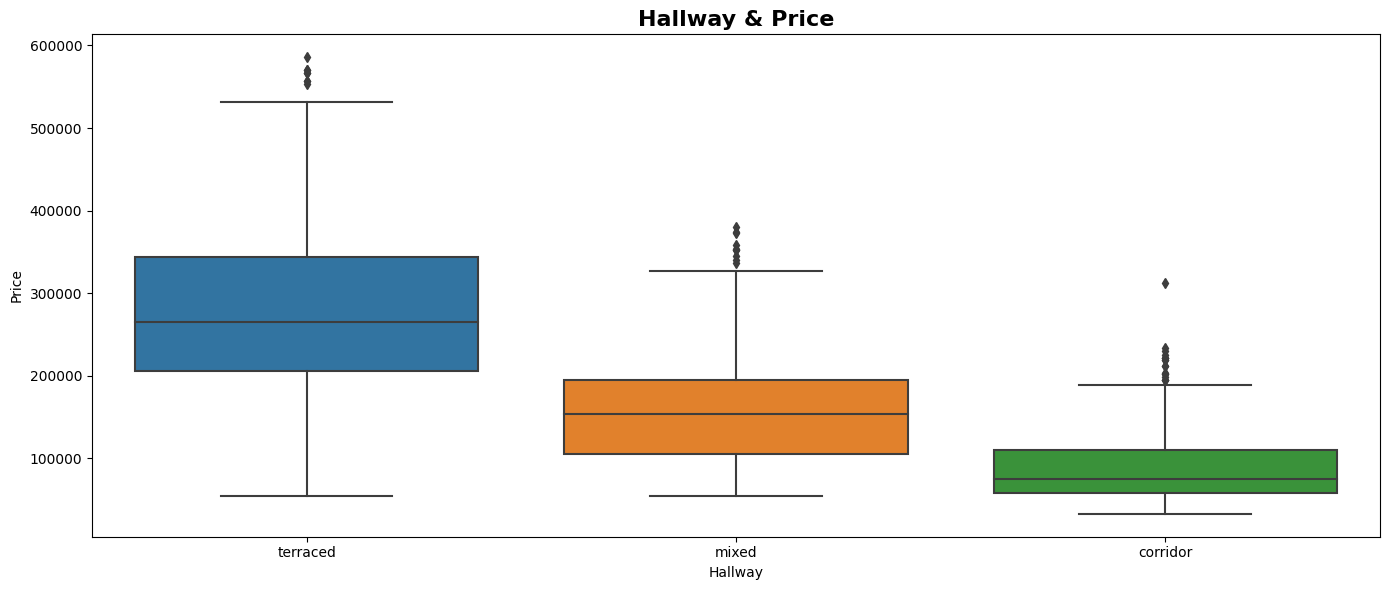

In [109]:
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=df["Hallway"], y="Price", data=df)
plt.title("Hallway & Price",fontsize=16,fontweight="bold")
f.tight_layout()

This price & hallway visualization tells us terraced type apartments are valued most, corridor hallways are valued least, and mixed hallways are valued in the middle. In words, this visualization there's an order in value which justifies encoding it ordinally.

This visualization also tells us there are some outliers which may or may not improve the model if removed, particularly the ones in corridor type apartments. 

This analyst will leave it as it is for now and might use this information to improve the model in the future. 

In [110]:

#Binary
transformer = ColumnTransformer([
    ('Binary', ce.BinaryEncoder(), 
    ['Subway_Station'])], 
    remainder='passthrough',verbose_feature_names_out=True)

# Modelling

In [111]:

X = df_2.drop(['Price'], axis=1)
y = df_2['Price']

In [112]:
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=101)

#### Algorithms Used

Based on the previous visualizations in the EDA phase, the data shows slight linear tendency in terms of price to size up to a certain point, until then the residuals start to deviate from the line.

Visualizations of price and other variables also lack linearity, as can be seen in price to year visualization.

Because of this reasons, this analyst decides to focus on using algorithms that are capable of handling non-linear data along with non-parametric flexibility.

In [113]:
 

knn = KNeighborsRegressor()
rf = RandomForestRegressor(random_state=101)
dt = DecisionTreeRegressor(random_state=101)
xgb = XGBRegressor(random_state=101)
lr = LinearRegression()


# Trasnformed using log
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Algorithms to test
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
mean_rmse = []
std_rmse = []

score_mae = []
mean_mae = []
std_mae = []

score_mape = []
mean_mape = []
std_mape = []

score_r2 = []
mean_r2 = []
std_r2 = []

# Running through all the algorithms to find the best
for i in models:
    
    crossval = KFold(n_splits=10, shuffle=True, random_state=101)

    estimator = Pipeline([
        ('preprocessing', transformer),
        
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    mean_rmse.append(model_cv_rmse.mean())
    std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    mean_mae.append(model_cv_mae.mean())
    std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)
    
    score_mape.append(model_cv_mape)
    mean_mape.append(model_cv_mape.mean())
    std_mape.append(model_cv_mape.std())
    #R2
    model_cv_r2 = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='r2', 
        error_score='raise'
        )

    print(model_cv_r2, i)

    score_r2.append(model_cv_r2)
    mean_r2.append(model_cv_r2.mean())
    std_r2.append(model_cv_r2.std())

[-62246.48705494 -55624.24938914 -65391.72401226 -64853.01557284
 -60869.28240286 -63092.38809226 -65493.24390341 -64796.71790982
 -58620.35071488 -57244.30394738] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-46805.10526043 -43904.68304052 -49598.14504408 -49769.18371317
 -46841.22498469 -43589.13192043 -49174.87445667 -49759.94004867
 -45013.92790656 -42520.22439056] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.25318565 -0.24425048 -0.23875997 -0.23755471 -0.24063325 -0.22261928
 -0.25241698 -0.24395383 -0.24137044 -0.23429219] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[0.61070834 0.74478926 0.62196175 0.58807294 0.64138615 0.6219773
 0.61415182 0.62982711 0.68271467 0.70049599] TransformedTargetRegressor(func=<ufunc 'l

In [114]:
estimator

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Binary', BinaryEncoder(),
                                                  ['Subway_Station'])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=XGBRegressor(base_score=None,
                                                                   booster=None,
                                                                   callbacks=None,
                                                                   colsample_bylevel=None,
                                                                   colsample_bynode=None,
                                                                   colsample_bytree=Non...
                                                                   gpu_id=None,
                                                                   grow_policy=None,
                                                                   importance_type=None,
                                                                   interaction_constraints=None,
                                                                   learning_rate=None,
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=None,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   n_estimators=100,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   predictor=None,
                                                                   random_state=101, ...)))])

In [115]:
score_r2

[array([0.61070834, 0.74478926, 0.62196175, 0.58807294, 0.64138615,
        0.6219773 , 0.61415182, 0.62982711, 0.68271467, 0.70049599]),
 array([0.8003835 , 0.78178463, 0.81857037, 0.76330409, 0.78956786,
        0.82626153, 0.79378989, 0.80035315, 0.82182689, 0.82009067]),
 array([0.80977885, 0.83365994, 0.83334065, 0.79818199, 0.83562211,
        0.87077745, 0.81112608, 0.84566193, 0.84881825, 0.85485757]),
 array([0.80986773, 0.8334938 , 0.8344345 , 0.79896405, 0.83560949,
        0.87091619, 0.81103384, 0.84583932, 0.8487615 , 0.85316182]),
 array([0.81019157, 0.83374987, 0.83335328, 0.79835943, 0.83565875,
        0.87076279, 0.81120039, 0.84573343, 0.84884719, 0.85495877])]

In [116]:
bench = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': mean_rmse,
    'Std_RMSE': std_rmse,
    'Mean_MAE': mean_mae,
    'Std_MAE': std_mae,
    'Mean_MAPE': mean_mape,
    'Std_MAPE': std_mape,
    'Mean_R2' : mean_r2,
    'Std_R2' : std_r2
})

bench.sort_values(['Mean_RMSE', 'Mean_MAE'], ascending=False)

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE,Mean_R2,Std_R2
4,XGBoost Regressor,-42318.538335,2669.490131,-32878.173505,2327.017034,-0.173978,0.010413,0.834282,0.021233
3,RandomForest Regressor,-42329.544829,2645.787151,-32886.241318,2309.392010,-0.174060,0.010388,0.834208,0.021043
2,DecisionTree Regressor,-42330.533094,2674.744056,-32889.613190,2334.476740,-0.174065,0.010523,0.834182,0.021305
1,KNN Regressor,-46362.989518,2540.603150,-35541.895607,2145.786786,-0.193397,0.014837,0.801593,0.019275
0,Linear Regression,-61823.176300,3414.332547,-46697.644077,2667.263889,-0.240904,0.008355,0.645609,0.045966


In terms of RMSE, MAE, MAPE, and R-Squared, XGBoost and Random Forest are the top two models with best performance.

Now we will compare the scores of the two before we decide on which model we want to proceed with further.

In [117]:
## SCORE BEFORE TUNING

# Best 2 models
models = {
    'XGB': XGBRegressor(random_state=101),
    'RF': RandomForestRegressor(random_state=101)
}

score_rmse = []
score_mae = []
score_mape = []

# Test set prediction
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,42353.950383,33316.828685,0.176250
RF,42320.545568,33296.724117,0.176297


Considering random forest has both lower RMSE and MAE, with only a slight higher MAPE, we will continue with tuning Random Forest Regression.

In [118]:
# Tuning Random Forest

# Maximum number of levels allowed in each decision tree
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]

# Number of features in consideration at every split
max_features = ['auto', 'sqrt']

# Tree Amount
n_estimators = [5,20,50,100]

# minimum sample number to split a node
min_samples_split = [2, 6, 10]

# minimum sample number that can be stored in a leaf node
min_samples_leaf = [1, 3, 4]

# method used to sample data points
bootstrap = [True, False]

hyperparam_rf = {
    'model__n_estimators':n_estimators,
    'model__max_depth': max_depth, 
    'model__min_samples_split': min_samples_split,
    'model__min_samples_leaf':min_samples_leaf,
    'model__bootstrap': bootstrap,
    'model__max_features': max_features,
}

rf = RandomForestRegressor(random_state=1)

estimator_rf = Pipeline([
        ('preprocessing', transformer),
        ('scaling', RobustScaler()),
        ('model', rf)
        ])

crossval = KFold(n_splits=10, shuffle=True, random_state=101)

random_rf = RandomizedSearchCV(
    estimator_rf, 
    param_distributions = hyperparam_rf,
    n_iter = 100,
    cv = crossval, 
    scoring = ['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'], 
    n_jobs = -1,
    refit = 'neg_mean_squared_error',
    random_state = 1  
)

random_rf.fit(X_train, y_train)

print('Random Forest')
print('Best_score:', random_rf.best_score_)
print('Best_params:', random_rf.best_params_)

Random Forest
Best_score: -1783596006.502622
Best_params: {'model__n_estimators': 100, 'model__min_samples_split': 10, 'model__min_samples_leaf': 1, 'model__max_features': 'sqrt', 'model__max_depth': 10, 'model__bootstrap': True}


In [119]:
# Test set with tuned model
# Model Random Forest Regressor
model = {'RF': RandomForestRegressor(random_state=101)}

# Using Best estimator
rf_tuning = random_rf.best_estimator_

# Fit
rf_tuning.fit(X_train, y_train)

# Test Set Prediction
y_pred_rf_tuning = rf_tuning.predict(X_test)

# MSE, MAE, MAPE
rmse_rf_tuning = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuning))
mae_rf_tuning = mean_absolute_error(y_test, y_pred_rf_tuning)
mape_rf_tuning = mean_absolute_percentage_error(y_test, y_pred_rf_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_rf_tuning, 'MAE': mae_rf_tuning, 'MAPE': mape_rf_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
RF,42263.830241,33259.191309,0.176324


In [120]:
score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,42353.950383,33316.828685,0.176250
RF,42320.545568,33296.724117,0.176297


As can be seen on the two tables above, RandomForestRegressor have better performances in terms of RMSE and MAE if compared to not-tuned RFF and not-tuned XGB. 

The only tradeoff is a slight, ~0.00007%, mean absolute percentage performance decline. 

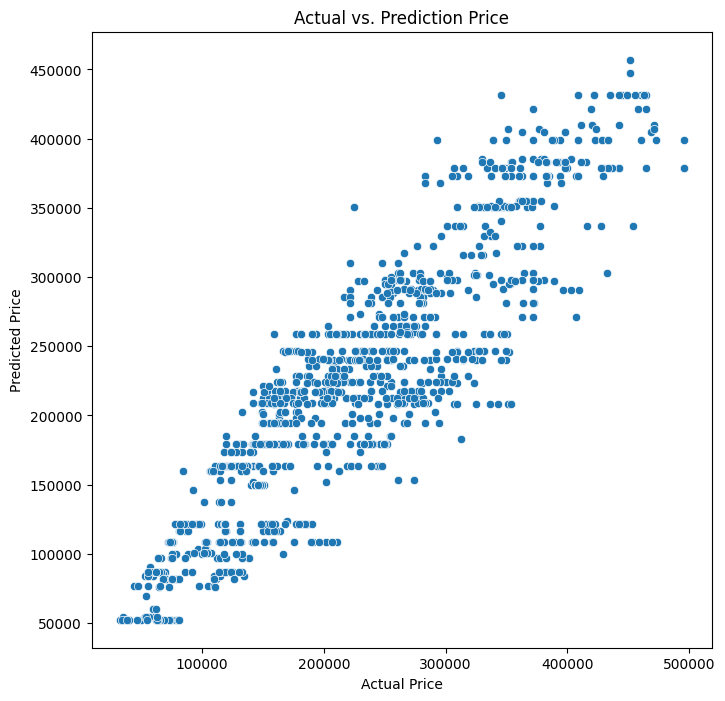

In [121]:
plt.figure(figsize=(8, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_rf_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price')


In [122]:
y_test_test = y_test.tolist()

Below is a table that shows the absolute error and absolute percentage error, to have an idea of what can be improved.

For the record, the formula for error is simple: measurement - true value. 

It is made absolute because there definitely will be negative numbers and since we're calculating the distance between true value and prediction, negative values do not really matter, only the absolute form does. 

The percentage formula is basically the same as absolute error formula made into percentage.


In [124]:
df_result = pd.DataFrame(data=y_test_test, columns=["Y_Test"], dtype=None, copy=None)
df_result["Prediction"] = y_pred_rf_tuning.tolist()



df_result["Difference"] = abs(df_result["Y_Test"]-df_result["Prediction"])
df_result["%"] = abs(df_result["Difference"]/df_result["Y_Test"]*100)
df_result.sort_values("%",ascending=False).tail(30)

,Y_Test,Prediction,Difference,%
694,300884,299672.014907,1211.985093,0.402808
370,263716,264604.794009,888.794009,0.337027
1073,53982,54162.806014,180.806014,0.334938
998,149274,149725.383582,451.383582,0.302386
1014,149274,149725.383582,451.383582,0.302386
94,149274,149725.383582,451.383582,0.302386
746,149274,149725.383582,451.383582,0.302386
171,149274,149725.383582,451.383582,0.302386
637,149274,149725.383582,451.383582,0.302386
556,149274,149725.383582,451.383582,0.302386


In [575]:
df_result.sort_values("%",ascending=False).head(60)

,Y_Test,Prediction,Difference,%
270,84070,159962.214569,75892.214569,90.272647
313,44247,76988.205872,32741.205872,73.996442
3,159292,258757.527159,99465.527159,62.442261
839,47787,76988.205872,29201.205872,61.107008
172,32743,52400.431869,19657.431869,60.035525
747,53097,83784.327105,30687.327105,57.794842
689,92920,146264.586996,53344.586996,57.409155
389,57522,90134.822598,32612.822598,56.696260
985,77876,121633.201668,43757.201668,56.188301
448,77876,121633.201668,43757.201668,56.188301


# Conclusion and Recommendation

### Conclusion: Data Science Version

Even though the outliers are removed, there are some outliers remaining in the dependent variable along with some other variables such as apartment size and this analyst assumes that is one of the main reasons why the **Random Forest Regressor** is algorithm that performs best with this dataset.

The evaluation metrics used are Mean Average Percentage Error, Mean Average Error, and Root Mean Squared Error. Considering the nature of the data and, even though some are removed, the various outliers in various aspects, this analyst believes MAE and MAPE hold more weight in this evaluation than RMSE which is more affected by outliers.

The final MAE is 33259.19, which even though from a business point of view it may still seem high, it is not all worrying considering the MAPE of 17.6%.

We will take a look at various sources and their MAPE standards:

Stephen Allwright.com:

MAPE Interpretation I
|MAPE | Rating |
|---|---|
< 10 %	|Very good
10 % - 20 %	|Good
20 % - 50 %|	OK
|> 50 % |	Not good|

(source: https://stephenallwright.com/good-mape-score/)




MAPE Interpretation II

| MAPE | Rating |
| --- | --- |
| >50%       | Poor            |
| 20% – 50% | Relatively good |
| 10% – 20%  | Good            |
| < 10%     | Great           |

(source: https://datagy.io/mape-python/)

If we use these benchmarks to rate this model, it's fair to say this model's performance is good but of course simple benchmark means nothing if not paired with the context of the data and the target business itself.

One consideration is that apartment pricing is influenced by various factors such as the features that are included in the dataframe and many others that aren't such as:

- neighborhood type - this dataframe only includes nearest station and distance to station which could prove to be ambiguous and confuse the model.

- amount of rooms - dataframe includes size but not information on the amount of rooms, bathrooms, etc

- what apartment building does the apartment units listed belong to - average apartment prices could vary differently per apartment buildings because of architechture, design, and even emotional values.

- other information that could very much help with explaining why certain apartment prices are either very high or very low if compared to other apartments with the same spec and area that could very well help analysts decide if such information should be included or considered noise.

With the various limitations including time and lack of clear information, not to mention this is the first version of the model that has not been further optimized for maximum performance, this analyst believes this model performs quite well.

Seeing the chart there are some key things that stands out in the model:
- If visualized in a scatterplot, a relatively clear linear pattern appears.
- Most of the predictions that have high error are apartments priced below 100,000.
- There is one prediction that stands out with an error of 90.3% which very much warrants further investigation. Considering the erratic nature of the prediction, this analyst highly suspects the cause of that fatal error is multicollinearity.

### Conclusion: Business Version

Apartment prices are determined based on tangible values such as location, size, facilities, transportation access and such, but since the prices are also determined by humans it is also affected by intangible, and often emotional motivations such as urgency, which explains why there are many prices that are below market average, and greed, which could be the reason why there are prices that are far above market average, and even lack of knowledge, which might be the explanation as to why some prices simply doesn't make sense. 

In the apartment market, setting the right price for the unit sold is key to be able to effectively and quickly transfer the unit from the seller to the buyers. It would be a tremendous help to the sellers and even the buyers if there is a tool that could predict for them the exact right price. In reality, however, there is rarely ever a right price. 

These factors makes it difficult, if not impossible, to develop tools that are flawless in its prediction. Fortunately, this model is the next best thing.

This model boasts a 17.6% average error rate, meaning this model has a chance to only deviate by 17.6% from the actual price, which is categorized to be decent or even good by most data science standards. Putting this into context of the apartment market that has various different price range, even of the same specs, this model's performance is quite reliable. 

To put this into perspective, let's take a look at the pie chart below.

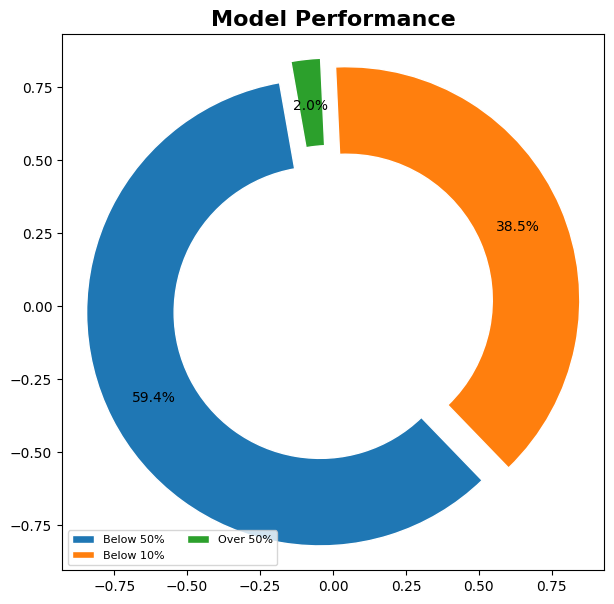

In [576]:
def percent_grouper (x):
    if x <= 10:
        return "Below 10%"
    
    elif x < 50:
        return "Below 50%"
    elif x > 50:
        return "Over 50%"
    
df_result["Error"] = df_result["%"].apply(percent_grouper)

labels = ["Below 50%", "Below 10%", "Over 50%"]

fig, ax = plt.subplots(figsize=(7,7))
ax.pie(df_result["Error"].value_counts(), 
       radius=0.8, startangle=100, 
       autopct="%.1f%%",
       pctdistance=0.8,
       labeldistance=1.1,
       frame=True,
       explode = (0.05,0.05,0.05), 
       wedgeprops=dict(width=0.3, edgecolor='w'),
       )

for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

plt.title("Model Performance",fontsize=16,fontweight="bold")
plt.legend(labels,ncol=2, loc="lower left", frameon=True, prop={"size":8})

The chart above is divided into 3 categories:

- Prediction with an error percentage over 50% (bad)
- Prediction with an error percentage under 50% (good)
- Prediction with an error percentage under 10% (excellent)

As we can see on the chart, there is only 2% bad prediction made by the model, a very small, forgivable percentage of error, considering there is no such thing as a perfect model.

Predictions that performed moderately well and has an error percentage of under 50% makes up 59% of the total predictions. This is a sign that the model could perform relatively well with very small disasterous predictions.

Predictions that has excellent error margin makes up a surprising 38.5% of the total results. This tells us that not only does this model have the capacity to produce reliable results, it also tells us it has a large potential to perform highly accurate predictions.

If compared to traditional pricing methods, this model proves advantageous in terms of:
- Less time consumed researching / surveying market condition.
- Less manpower needed for researching and instead only needing key persons to crosscheck unusual predictions.
- Less time and manpower needed means less cost and resources spent, which in turn means more convenience for the buyers and more cost and resource efficiency for sellers.
- Relatively minimum error tradeoff.

It is true that this model does have some flaws and have much room for improvement but, based on the facts that we've discussed above, this model could provide a very good idea on the average price range of apartments in Daegu for both apartment sellers and apartment seekers.


After all, there is no way for a person to know exactly the right price of an apartment. **The next best thing is to have a good idea of the price, and this is the solution that this model offers.**

### Recommendation

#### **Usage Recommendations**:
- This analyst advises against using this model for real-time use (eg: property search engines, apps) considering it is not yet optimized for real-time computing results.

<br>

- If this model is to be used for real-time service, it is highly advised to first test with high amount of data and calculate the processing time computational resource needed. It would be a good idea to instead replicate this model but using XGBoost, which is known to be better in scalability, speed, and performance.

<br>

- It is highly recommended that this model is not used as the sole resource to determine apartment prices. This model is far from perfect and some, although rare, fatal errors may occur. 

<br>

- Domain knowledge of Daegu and the characteristics of the area (neighborhood type, location) is highly recommended.

<br>

- Certain price points, especially ones under 100,000, are to be closely paid attention to as most of the high price deviations are for apartment units under those prices.

#### **Future Development Recommendations**:
Considering there are various limitations such as data and time, this model is still far from ideal. These suggestions are for both I and others that wish to develop this model further:

- Investigate certain predictions with highly unusual error rates (such as the one with over 90% MAPE). Investigation could be done by matching the price of the prediction in question with the price in the dataframe. If multiple results appear with the same price, compare the price with other of similar specs to decide if the data is to be removed or not.

- Considering there seems to be groups of apartment units that have higher prices than others that are nearby the same station (particularly Daegu Station), investigate if there are more than one neighborhood types in that area (perhaps one is more expensive than the other(s)) and consider sub-grouping based on price average. 

- Some features have high multicollinearity as can be seen in the VIF chart and in the correlation matrix. Some very alarming features, that also has relatively low correlation with the dependant variable, are:
    - Year - highest VIF value and relatively low correlation.
    - Basement parking - high VIF with Apartment Facilities and low correlation score with price.

<br>

- Considering the high VIF values of many input features, algorithms that handles multicollinearity well such as **ridge regression**. However, further investigation is needed to determine if the nature of the data is compatible with ridge's tendency to assume linear relationship between input features and output target.

- There are many apartment size outliers that could be a topic of consideration to decide whether or not removing them would lower the error rate of the model with the consequence of sacrificing variety.

- Although there is a good reason as to why most of the categorical features are encoded ordinally, perhaps experimenting with one-hot encoder or dummy variables might make a positive change (although the opposite could happen.)


- Involve someone that knows the in-depth details of Daegu. This can make the process highly easier by confirming some anomalies found in the dataset such as abnormal pricing, abnormal group of prices nearby the same subway station, and any other abnormalities found in the dataset. After all it is always highly recommended for data scientists to work together with people that have high domain knowledge of the issue.

- Even though the algorithm used in this model, RandomForestRegressor, is said to have reduced risk of overfitting, it is best to further test the performance of this model with other data available.

- Test this model with even higher amount of data to test for scalability. Currently this data consists of 4123 entries, perhaps try 40 thousand and even 400 thousand data.





#### **Data - Related Recommendations**:
This recommendation is addressed to whomever is responsible or could influence the collection of data:

- More data explanation could always be helpful. e.g: 
    - Hallway Type could include information as to which of the three types are more desired, more expensive, and maybe even the reason why.
    - Explanation about exactly what type of facilities are included in N_FacilitiesNearBy(ETC) -are they medical centers? Grocery stores? Malls? Police stations?
    <br>
<br>
- Apartment prices are also often determined by various factors that also could be included in the data such as:
    - Location (latitude, longitude)
    - Neighborhood - there are many cases where two neighborhood might be adjacent to one another but one is upscale housing and the other is budget housing.
    - Date - at the minimum information of the year of listing could be very useful. Like everything else, apartment prices go up. If information on when the apartment is listed it can be used to maybe group the apartments based on said year for a better understanding and performance of the model. 
    - Name of apartment buildings - by knowing which apartment building the unit belongs to, analysts will have a far better idea and understanding of the price of apartment unit types. This information could be used to understand better which prices are within reasonable market range and are to be included in the model and which prices are unreasonable and to be removed for better accuracy.  
<br>

- Subtle Noises:
    - At a glance there are no clear signs of data noise in the dataset, no missing values, duplicates or typos.

    <br>

    - Upon closer inspection there seems to be data with certain apartment specs that are out of place, such as apartments of a relatively large size listed at a questionable price that is the only one from a certain area.

    <br>

    - Subtle noises are the worst type of noise to have if there is no one to confirm if it is an error or if it is relevant to the model.

    <br>
    
    - More information on such noises or cooperation with people that has at least average-level domain knowledge of the matter could help tremendously with the data cleaning process and ultimately the model performance optimization.

In [513]:
import pickle

In [515]:
# Save model


estimator = Pipeline([('preprocess', transformer), ('model', RandomForestRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('Model_DaeguApartments_RF.sav', 'wb'))

In [516]:
# Load model
filename = 'Model_DaeguApartments_RF.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [517]:
np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))

42299.51872409657